# 01 - Exploración Inicial de Datos

**Objetivo:** Inspeccionar estructura y calidad de todas las fuentes de datos

**Fuentes a explorar:**
1. INEC - Censo Etnia 2022 (`1.2.csv`)
2. MSP - Recursos y Actividades de Salud 2020 (`RAS_2020.csv`)
3. CONALI - Límites parroquiales (shapefile)
4. MAATE - Infraestructura petrolera (5 shapefiles)

---

## 1. Setup e Imports

In [10]:
# Celda 0: Verificar e instalar dependencias
import sys
print(f"🐍 Python usado por el kernel: {sys.executable}")
print(f"📦 Instalando librerías en este Python...\n")

!{sys.executable} -m pip install pandas numpy geopandas shapely pyproj fiona matplotlib seaborn plotly folium tqdm openpyxl rtree

🐍 Python usado por el kernel: /opt/homebrew/opt/python@3.10/bin/python3.10
📦 Instalando librerías en este Python...

  Using cached folium-0.20.0-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.6 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [11]:
# Imports básicos
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

# Configuración
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

# Rutas base
BASE_DIR = Path('../data/raw')
INEC_DIR = BASE_DIR / 'inec_etnia_2022'
MSP_DIR = BASE_DIR / 'msp_ras_2020'
CONALI_DIR = BASE_DIR / 'conali_limites'
MAATE_DIR = BASE_DIR / 'maate_petroleo'

print("✅ Librerías cargadas correctamente")
print(f"📁 Directorio base: {BASE_DIR.resolve()}")

✅ Librerías cargadas correctamente
📁 Directorio base: /Volumes/HP P500/tfm-afroecuador-salud/data/raw


---
## 2. Exploración: INEC - Censo Etnia 2022

**Archivo:** `1.2.csv`

**Problema conocido:** 
- Primeras 11 filas tienen títulos/encabezados basura
- Cada parroquia tiene 3 filas (Total, Hombres, Mujeres)
- Solo necesitamos las filas "Total"

In [13]:
# Cargar archivo completo primero para ver la estructura
etnia_raw = pd.read_csv(INEC_DIR / '1.2.csv', encoding='latin-1')

print("🔍 ESTRUCTURA COMPLETA DEL ARCHIVO")
print(f"Dimensiones: {etnia_raw.shape}")
print(f"\nPrimeras 15 filas (con basura incluida):")
etnia_raw.head(15)

🔍 ESTRUCTURA COMPLETA DEL ARCHIVO
Dimensiones: (3876, 14)

Primeras 15 filas (con basura incluida):


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Tabla.N°:,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Nombre de la tabla:,Población por autoidentificación según cultura...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Fuente:,VIII Censo de Población y VII de Vivienda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Elaboración:,Instituto Nacional de Estadística y Censos (IN...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Índice,"Provincia, cantón, parroquia de residencia y s...",NaN,NaN,NaN,Número total de personas,Autoidentificación según cultura y costumbres,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,Indigena,Afroecuatoriano/a o Afrodescendiente,Negra/o,Mulata/o,Montubia/o,Mestiza/o,Blanca/o,Otro
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Cargar saltando las primeras 9 filas
etnia = pd.read_csv(INEC_DIR / '1.2.csv', skiprows=9, encoding='latin-1')

print("🔍 DATOS LIMPIOS (sin encabezados basura)")
print(f"Dimensiones: {etnia.shape}")
print(f"\nColumnas disponibles:")
print(etnia.columns.tolist())
print(f"\nPrimeras 10 filas:")
etnia.head(10)

🔍 DATOS LIMPIOS (sin encabezados basura)
Dimensiones: (3867, 14)

Columnas disponibles:
['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Indigena', 'Afroecuatoriano/a o Afrodescendiente', 'Negra/o', 'Mulata/o', 'Montubia/o', 'Mestiza/o', 'Blanca/o', 'Otro']

Primeras 10 filas:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Indigena,Afroecuatoriano/a o Afrodescendiente,Negra/o,Mulata/o,Montubia/o,Mestiza/o,Blanca/o,Otro
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Total Nacional,Nacional,Nacional,Nacional,"16,938,986","1,302,057","343,426","225,817","245,252","1,305,000","13,122,337","374,930","20,167"
2,NaN,Total Nacional,Nacional,Nacional,Hombres,"8,252,523","633,328","167,838","114,333","121,837","668,713","6,354,515","180,449","11,510"
3,NaN,Total Nacional,Nacional,Nacional,Mujeres,"8,686,463","668,729","175,588","111,484","123,415","636,287","6,767,822","194,481","8,657"
4,NaN,Azuay,Total Azuay,Total Azuay,Total Azuay,"801,609","15,992","2,854","1,385","2,853","3,315","758,909","15,998",303
5,NaN,Azuay,Total Azuay,Total Azuay,Hombres,"376,419","7,669","1,538",844,"1,511","1,757","355,231","7,698",171
6,NaN,Azuay,Total Azuay,Total Azuay,Mujeres,"425,190","8,323","1,316",541,"1,342","1,558","403,678","8,300",132
7,NaN,Azuay,Cuenca,Total Cuenca,Total Cuenca,"596,101","8,740","2,156","1,061","2,175","2,481","565,885","13,315",288
8,NaN,Azuay,Cuenca,Total Cuenca,Hombres,"281,823","4,343","1,191",674,"1,178","1,330","266,547","6,399",161
9,NaN,Azuay,Cuenca,Total Cuenca,Mujeres,"314,278","4,397",965,387,997,"1,151","299,338","6,916",127


In [34]:
# Inspeccionar nombres de columnas (probablemente sean feos)
print("📋 NOMBRES DE COLUMNAS ORIGINALES:")
for i, col in enumerate(etnia.columns):
    print(f"[{i}] {col}")

📋 NOMBRES DE COLUMNAS ORIGINALES:
[0] Unnamed: 0
[1] Unnamed: 1
[2] Unnamed: 2
[3] Unnamed: 3
[4] Unnamed: 4
[5] Unnamed: 5
[6] Indigena
[7] Afroecuatoriano/a o Afrodescendiente
[8] Negra/o
[9] Mulata/o
[10] Montubia/o
[11] Mestiza/o
[12] Blanca/o
[13] Otro


In [33]:
# Eliminar primera fila si está vacía
if etnia.iloc[0].isna().all():
    etnia = etnia.iloc[1:].reset_index(drop=True)
    print("✂️ Eliminada fila vacía inicial")

# Identificar qué columnas corresponden a qué
# Según descripción:
# - Columna B (índice 1): Provincia
# - Columna C (índice 2): Cantón
# - Columna D (índice 3): Parroquia
# - Columna E (índice 4): Desagregación (Total/Hombres/Mujeres)
# - Columna F (índice 5): Total población
# - Columna H (índice 7): Población Afroecuatoriana

print("🔎 VERIFICACIÓN DE COLUMNAS CLAVE:")
print(f"\nColumna 1 (Provincia): {etnia.iloc[:5, 1].tolist()}")
print(f"\nColumna 2 (Cantón): {etnia.iloc[:5, 2].tolist()}")
print(f"\nColumna 3 (Parroquia): {etnia.iloc[:5, 3].tolist()}")
print(f"\nColumna 4 (Desagregación): {etnia.iloc[:5, 4].tolist()}")


🔎 VERIFICACIÓN DE COLUMNAS CLAVE:

Columna 1 (Provincia): ['Total Nacional', 'Total Nacional', 'Total Nacional', 'Azuay', 'Azuay']

Columna 2 (Cantón): ['Nacional', 'Nacional', 'Nacional', 'Total Azuay', 'Total Azuay']

Columna 3 (Parroquia): ['Nacional', 'Nacional', 'Nacional', 'Total Azuay', 'Total Azuay']

Columna 4 (Desagregación): ['Nacional', 'Hombres', 'Mujeres', 'Total Azuay', 'Hombres']


In [32]:
# Identificar columnas (ajustar índices según corresponda)
# Según la estructura del INEC:
# Columna 1: Provincia
# Columna 2: Cantón  
# Columna 3: Parroquia
# Columna 4: Desagregación (Total/Hombres/Mujeres)

col_provincia = etnia.columns[1]
col_canton = etnia.columns[2]
col_parroquia = etnia.columns[3]
col_desagregacion = etnia.columns[4]

print("🔍 VERIFICACIÓN DE COLUMNAS:")
print(f"Provincia: {col_provincia}")
print(f"Cantón: {col_canton}")
print(f"Parroquia: {col_parroquia}")
print(f"Desagregación: {col_desagregacion}")

# Ver valores únicos en desagregación
print("\n🔍 VALORES ÚNICOS EN COLUMNA DE DESAGREGACIÓN:")
print(etnia[col_desagregacion].value_counts().head(20))

🔍 VERIFICACIÓN DE COLUMNAS:
Provincia: Unnamed: 1
Cantón: Unnamed: 2
Parroquia: Unnamed: 3
Desagregación: Unnamed: 4

🔍 VALORES ÚNICOS EN COLUMNA DE DESAGREGACIÓN:
Unnamed: 4
Mujeres                1288
Hombres                1288
Total San Antonio         7
Total Atahualpa           6
Total Bolívar             6
Total La Unión            6
Total Olmedo              5
Total Santa Rosa          5
Total Montalvo            5
Total Simón Bolívar       5
Total San Lorenzo         4
Total Santa Elena         4
Total La Victoria         4
Total El Rosario          4
Total El Triunfo          4
Total Santiago            4
Total San Miguel          4
Total San Vicente         4
Total Bellavista          4
Total Salinas             4
Name: count, dtype: int64


In [38]:
# FILTRADO EN TRES PASOS:
# 1. Solo filas que contienen "Total" (excluir Hombres/Mujeres)
# 2. Solo nivel PARROQUIAL (excluir provincial y cantonal)
# 3. Excluir filas "Total [ciudad]" (agregados cantonales)

# Paso 1: Filtrar solo filas con "Total"
mask_total = etnia[col_desagregacion].astype(str).str.contains('Total', na=False, case=False)
etnia_total = etnia[mask_total].copy()

print(f"📊 PASO 1 - Filtrar solo 'Total':")
print(f"Filas originales: {len(etnia)}")
print(f"Filas con 'Total': {len(etnia_total)}")

# Paso 2: Filtrar solo nivel PARROQUIAL
# Criterio: Provincia, Cantón y Parroquia deben ser DIFERENTES
mask_parroquial = (
    (etnia_total[col_provincia] != etnia_total[col_canton]) & 
    (etnia_total[col_canton] != etnia_total[col_parroquia]) &
    # Además, desagregación NO debe ser "Nacional"
    (~etnia_total[col_desagregacion].str.contains('Nacional', na=False, case=False))
)

etnia_parroquial_temp = etnia_total[mask_parroquial].copy()

print(f"\n📊 PASO 2 - Filtrar solo nivel PARROQUIAL:")
print(f"Filas 'Total': {len(etnia_total)}")
print(f"Filas nivel parroquial (temp): {len(etnia_parroquial_temp)}")

# Paso 3: Eliminar filas donde parroquia == desagregación (son agregados cantonales tipo "Total Cuenca")
# Si la parroquia se llama "Total Cuenca" y la desagregación también dice "Total Cuenca", es un agregado
mask_no_agregado = (
    etnia_parroquial_temp[col_parroquia] != etnia_parroquial_temp[col_desagregacion]
)

etnia_parroquias = etnia_parroquial_temp[mask_no_agregado].copy()

print(f"\n📊 PASO 3 - Eliminar agregados cantonales (Total Ciudad):")
print(f"Filas antes: {len(etnia_parroquial_temp)}")
print(f"Filas después: {len(etnia_parroquias)}")
print(f"Eliminadas (agregados): {len(etnia_parroquial_temp) - len(etnia_parroquias)}")

print(f"\n✅ DATOS FINALES FILTRADOS:")
print(f"Total parroquias reales: {len(etnia_parroquias)}")
print(f"\nMuestra de datos filtrados:")
etnia_parroquias[[col_provincia, col_canton, col_parroquia, col_desagregacion]].head(20)

📊 PASO 1 - Filtrar solo 'Total':
Filas originales: 3866
Filas con 'Total': 1287

📊 PASO 2 - Filtrar solo nivel PARROQUIAL:
Filas 'Total': 1287
Filas nivel parroquial (temp): 1037

📊 PASO 3 - Eliminar agregados cantonales (Total Ciudad):
Filas antes: 1037
Filas después: 822
Eliminadas (agregados): 215

✅ DATOS FINALES FILTRADOS:
Total parroquias reales: 822

Muestra de datos filtrados:


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
12,Azuay,Cuenca,Baños,Total Baños
15,Azuay,Cuenca,Cumbe,Total Cumbe
18,Azuay,Cuenca,Chaucha,Total Chaucha
21,Azuay,Cuenca,Checa,Total Checa
24,Azuay,Cuenca,Chiquintad,Total Chiquintad
27,Azuay,Cuenca,Llacao,Total Llacao
30,Azuay,Cuenca,Molleturo,Total Molleturo
33,Azuay,Cuenca,Nulti,Total Nulti
36,Azuay,Cuenca,Octavio Cordero Palacios,Total Octavio Cordero Palacios
39,Azuay,Cuenca,Paccha,Total Paccha


In [39]:
# Verificar que el filtro funciona bien
print("🔍 VERIFICACIÓN DEL FILTRO:")
print("\nEjemplos de lo que quedó (debe ser solo parroquias):")
sample = etnia_parroquias[[col_provincia, col_canton, col_parroquia]].head(10)
print(sample)

print("\n🚫 Ejemplos de lo que se eliminó (provincial/cantonal):")
mask_eliminado = ~mask_parroquial
eliminados = etnia_total[mask_eliminado][[col_provincia, col_canton, col_parroquia]].head(10)
print(eliminados)

🔍 VERIFICACIÓN DEL FILTRO:

Ejemplos de lo que quedó (debe ser solo parroquias):
   Unnamed: 1 Unnamed: 2                Unnamed: 3
12      Azuay     Cuenca                     Baños
15      Azuay     Cuenca                     Cumbe
18      Azuay     Cuenca                   Chaucha
21      Azuay     Cuenca                     Checa
24      Azuay     Cuenca                Chiquintad
27      Azuay     Cuenca                    Llacao
30      Azuay     Cuenca                 Molleturo
33      Azuay     Cuenca                     Nulti
36      Azuay     Cuenca  Octavio Cordero Palacios
39      Azuay     Cuenca                    Paccha

🚫 Ejemplos de lo que se eliminó (provincial/cantonal):
    Unnamed: 1    Unnamed: 2    Unnamed: 3
3        Azuay   Total Azuay   Total Azuay
9        Azuay        Cuenca        Cuenca
78       Azuay         Girón         Girón
90       Azuay      Gualaceo      Gualaceo
120      Azuay         Nabón         Nabón
135      Azuay         Paute         Paute
1

In [50]:
# Seleccionar solo las columnas que necesitamos
# Índices: 1=provincia, 2=canton, 3=parroquia, 5=pob_total, 7=pob_afro
etnia_clean = etnia_parroquias.iloc[:, [1, 2, 3, 5, 7]].copy()

# Renombrar columnas
etnia_clean.columns = ['provincia', 'canton', 'parroquia', 'poblacion_total', 'poblacion_afro']

print("✂️ COLUMNAS SELECCIONADAS Y RENOMBRADAS:")
print(etnia_clean.columns.tolist())
print(f"\nMuestra de datos SIN limpiar:")
print(etnia_clean.head(10))

✂️ COLUMNAS SELECCIONADAS Y RENOMBRADAS:
['provincia', 'canton', 'parroquia', 'poblacion_total', 'poblacion_afro']

Muestra de datos SIN limpiar:
   provincia  canton                 parroquia poblacion_total poblacion_afro
12     Azuay  Cuenca                     Baños          21,797             26
15     Azuay  Cuenca                     Cumbe           6,455            NaN
18     Azuay  Cuenca                   Chaucha           1,721              2
21     Azuay  Cuenca                     Checa           3,204             24
24     Azuay  Cuenca                Chiquintad           5,738             24
27     Azuay  Cuenca                    Llacao           7,468              6
30     Azuay  Cuenca                 Molleturo           6,882              5
33     Azuay  Cuenca                     Nulti           6,707             14
36     Azuay  Cuenca  Octavio Cordero Palacios           2,516            NaN
39     Azuay  Cuenca                    Paccha           8,497            

In [51]:
# Ver TODAS las columnas con sus índices
print("📋 TODAS LAS COLUMNAS CON ÍNDICES:")
for i, col in enumerate(etnia_parroquias.columns):
    print(f"[{i}] {col}")
    # Mostrar un valor de ejemplo
    sample_val = etnia_parroquias.iloc[0, i]
    print(f"    Ejemplo: {sample_val}\n")

📋 TODAS LAS COLUMNAS CON ÍNDICES:
[0] Unnamed: 0
    Ejemplo: nan

[1] Unnamed: 1
    Ejemplo: Azuay

[2] Unnamed: 2
    Ejemplo: Cuenca

[3] Unnamed: 3
    Ejemplo: Baños

[4] Unnamed: 4
    Ejemplo: Total Baños

[5] Unnamed: 5
    Ejemplo: 21,797

[6] Indigena
    Ejemplo: 345

[7] Afroecuatoriano/a o Afrodescendiente
    Ejemplo: 26

[8] Negra/o
    Ejemplo: 18

[9] Mulata/o
    Ejemplo: 27

[10] Montubia/o
    Ejemplo: 80

[11] Mestiza/o
    Ejemplo: 21,088

[12] Blanca/o
    Ejemplo: 209

[13] Otro
    Ejemplo: 4



In [53]:
# Verificar tipos de datos
print("🔍 TIPOS DE DATOS ANTES DE LIMPIAR:")
print(etnia_clean.dtypes)

# Ver ejemplos de cómo se ven los números
print("\n📊 EJEMPLOS DE VALORES (sin limpiar):")
print("Población total:", etnia_clean['poblacion_total'].head(10).tolist())
print("Población afro:", etnia_clean['poblacion_afro'].head(10).tolist())

# Limpiar y convertir columnas numéricas
# IMPORTANTE: Los números tienen comas como separadores de miles (21,797)
etnia_clean['poblacion_total'] = (
    etnia_clean['poblacion_total']
    .astype(str)
    .str.replace(',', '', regex=False)  # Eliminar comas
    .str.strip()                        # Eliminar espacios
)

etnia_clean['poblacion_afro'] = (
    etnia_clean['poblacion_afro']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

# Convertir a numérico
etnia_clean['poblacion_total'] = pd.to_numeric(etnia_clean['poblacion_total'], errors='coerce')
etnia_clean['poblacion_afro'] = pd.to_numeric(etnia_clean['poblacion_afro'], errors='coerce')

print("\n✅ TIPOS DE DATOS DESPUÉS DE LIMPIAR:")
print(etnia_clean.dtypes)

print("\n📊 ESTADÍSTICAS BÁSICAS:")
print(etnia_clean[['poblacion_total', 'poblacion_afro']].describe())

# Verificar cuántos NaN quedaron
print(f"\n⚠️ VALORES NULOS:")
print(f"Población total: {etnia_clean['poblacion_total'].isna().sum()} de {len(etnia_clean)}")
print(f"Población afro: {etnia_clean['poblacion_afro'].isna().sum()} de {len(etnia_clean)}")

# Mostrar algunas filas para verificar
print(f"\n✅ MUESTRA DE DATOS LIMPIOS:")
print(etnia_clean.head(15))

🔍 TIPOS DE DATOS ANTES DE LIMPIAR:
provincia          object
canton             object
parroquia          object
poblacion_total    object
poblacion_afro     object
dtype: object

📊 EJEMPLOS DE VALORES (sin limpiar):
Población total: ['21,797', '6,455', '1,721', '3,204', '5,738', '7,468', '6,882', '6,707', '2,516', '8,497']
Población afro: ['26', nan, '2', '24', '24', '6', '5', '14', nan, '15']

✅ TIPOS DE DATOS DESPUÉS DE LIMPIAR:
provincia           object
canton              object
parroquia           object
poblacion_total      int64
poblacion_afro     float64
dtype: object

📊 ESTADÍSTICAS BÁSICAS:
       poblacion_total  poblacion_afro
count     8.220000e+02      643.000000
mean      9.604321e+03      215.931571
std       6.543803e+04     1213.540005
min       7.600000e+01        1.000000
25%       1.439250e+03        4.000000
50%       3.095500e+03       15.000000
75%       6.917000e+03       62.500000
max       1.776364e+06    23813.000000

⚠️ VALORES NULOS:
Población total: 0 d

In [56]:
# Calcular porcentaje de población afroecuatoriana
etnia_clean['pct_poblacion_afro'] = (
    (etnia_clean['poblacion_afro'] / etnia_clean['poblacion_total']) * 100
).round(2)

# Manejar casos donde población total = 0 (evitar división por cero)
etnia_clean['pct_poblacion_afro'].fillna(0, inplace=True)

print("✅ VARIABLE CALCULADA: pct_poblacion_afro")
print(f"\nEstadísticas del porcentaje:")
print(etnia_clean['pct_poblacion_afro'].describe())

print(f"\n🔝 TOP 10 PARROQUIAS CON MAYOR % POBLACIÓN AFRO:")
top_afro = etnia_clean.nlargest(10, 'pct_poblacion_afro')[['provincia', 'canton', 'parroquia', 'poblacion_total', 'poblacion_afro', 'pct_poblacion_afro']]
print(top_afro.to_string())

print(f"\n📊 DISTRIBUCIÓN DE PORCENTAJES:")
print(f"Parroquias con > 50% población afro: {(etnia_clean['pct_poblacion_afro'] > 50).sum()}")
print(f"Parroquias con > 25% población afro: {(etnia_clean['pct_poblacion_afro'] > 25).sum()}")
print(f"Parroquias con > 10% población afro: {(etnia_clean['pct_poblacion_afro'] > 10).sum()}")
print(f"Parroquias con > 5% población afro: {(etnia_clean['pct_poblacion_afro'] > 5).sum()}")

✅ VARIABLE CALCULADA: pct_poblacion_afro

Estadísticas del porcentaje:
count    822.000000
mean       2.466204
std        9.242117
min        0.000000
25%        0.040000
50%        0.220000
75%        0.650000
max       82.590000
Name: pct_poblacion_afro, dtype: float64

🔝 TOP 10 PARROQUIAS CON MAYOR % POBLACIÓN AFRO:
       provincia       canton             parroquia  poblacion_total  poblacion_afro  pct_poblacion_afro
1353  Esmeraldas  San Lorenzo            5 de Junio              247           204.0               82.59
1368  Esmeraldas  San Lorenzo              Tambillo             1369          1130.0               82.54
1344  Esmeraldas  San Lorenzo                 Ancón             1415          1025.0               72.44
1278  Esmeraldas  Eloy Alfaro               Timbiré             1153           774.0               67.13
1266  Esmeraldas  Eloy Alfaro          Selva Alegre             1466           948.0               64.67
582       Carchi         Mira            Concepci

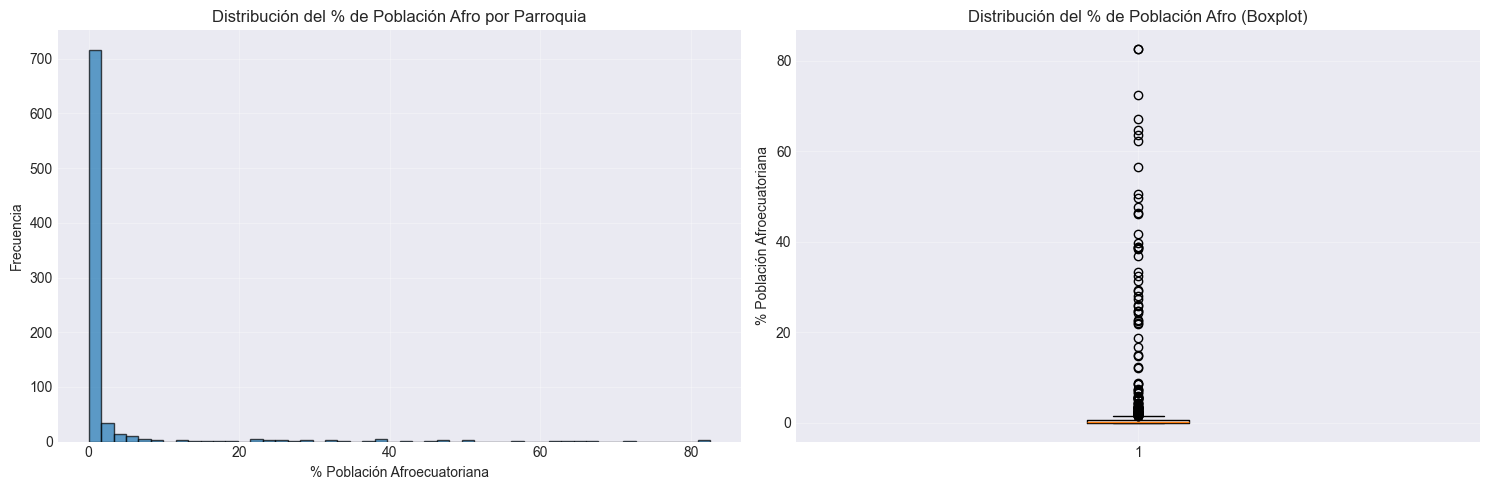

✅ Visualizaciones generadas


In [57]:
# Visualización: Distribución del % población afro
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(etnia_clean['pct_poblacion_afro'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('% Población Afroecuatoriana')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución del % de Población Afro por Parroquia')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(etnia_clean['pct_poblacion_afro'], vert=True)
axes[1].set_ylabel('% Población Afroecuatoriana')
axes[1].set_title('Distribución del % de Población Afro (Boxplot)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualizaciones generadas")

---
## 3. Exploración: MSP - RAS 2020

**Archivo:** `RAS_2020.csv`

**Columnas esperadas:**
- B: provincia_ub
- C: canton_ub
- D: parr_ub
- E: clase
- F: entidad
- G: sector
- H: tipo
- I: area
- J: region

In [60]:
# # Cargar RAS
# ras = pd.read_csv(MSP_DIR / 'RAS_2020.csv', encoding='latin-1')

# print("🏥 DATOS RAS 2020")
# print(f"Dimensiones: {ras.shape}")
# print(f"\nColumnas disponibles:")
# print(ras.columns.tolist())
# print(f"\nPrimeras 10 filas:")
# ras.head(10)

In [62]:
# Cargar RAS con encoding correcto y seleccionar solo columnas necesarias
print("🏥 CARGANDO RAS 2020...")

# Columnas que necesitamos
columnas_ras = ['secuencial', 'prov_ubi', 'cant_ubi', 'parr_ubi', 
                'clase', 'entidad', 'sector', 'tipo', 'area', 'region']

# Cargar solo esas columnas
ras = pd.read_csv(
    MSP_DIR / 'RAS_2020.csv', 
    encoding='utf-8-sig',  # utf-8-sig elimina el BOM automáticamente
    sep=';',
    usecols=columnas_ras
)

print("✅ RAS CARGADO EXITOSAMENTE")
print(f"\n📊 DIMENSIONES: {ras.shape}")
print(f"\n📋 COLUMNAS:")
print(ras.columns.tolist())
print(f"\n🔍 PRIMERAS 10 FILAS:")
print(ras.head(10))

🏥 CARGANDO RAS 2020...
✅ RAS CARGADO EXITOSAMENTE

📊 DIMENSIONES: (4136, 10)

📋 COLUMNAS:
['secuencial', 'prov_ubi', 'cant_ubi', 'parr_ubi', 'clase', 'entidad', 'sector', 'tipo', 'area', 'region']

🔍 PRIMERAS 10 FILAS:
   secuencial   prov_ubi         cant_ubi  \
0           1    Bolívar        Chillanes   
1           2     Manabí      San Vicente   
2           3   Imbabura         Cotacahi   
3           4      Cañar          Biblian   
4           5       Loja           Macará   
5           6  Pichincha            Quito   
6           7   Cotopaxi           Pujilí   
7           8  Sucumbíos  Gonzalo Pizarro   
8           9     Manabí            Junín   
9          10       Loja         Quilanga   

                                    parr_ubi  \
0                                  Chillanes   
1                                      Canoa   
2    Vacas Galindo (Cab. En San Miguel Alto)   
3                                    Biblián   
4  Macará (Manuel Enrique Rengel Suquilanda) 

In [63]:
# Información general
print("📊 INFORMACIÓN GENERAL:")
ras.info()

📊 INFORMACIÓN GENERAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4136 entries, 0 to 4135
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   secuencial  4136 non-null   int64 
 1   prov_ubi    4136 non-null   object
 2   cant_ubi    4136 non-null   object
 3   parr_ubi    4136 non-null   object
 4   clase       4136 non-null   object
 5   entidad     4136 non-null   object
 6   sector      4136 non-null   object
 7   tipo        4136 non-null   object
 8   area        4136 non-null   object
 9   region      4136 non-null   object
dtypes: int64(1), object(9)
memory usage: 323.2+ KB


In [64]:
# Análisis de valores nulos
print("🔍 VALORES NULOS POR COLUMNA:")
print(ras.isnull().sum())
print(f"\n% de nulos:")
print((ras.isnull().sum() / len(ras) * 100).round(2))

🔍 VALORES NULOS POR COLUMNA:
secuencial    0
prov_ubi      0
cant_ubi      0
parr_ubi      0
clase         0
entidad       0
sector        0
tipo          0
area          0
region        0
dtype: int64

% de nulos:
secuencial    0.0
prov_ubi      0.0
cant_ubi      0.0
parr_ubi      0.0
clase         0.0
entidad       0.0
sector        0.0
tipo          0.0
area          0.0
region        0.0
dtype: float64


In [67]:
# Distribución por provincia
print("🗺️ DISTRIBUCIÓN DE ESTABLECIMIENTOS POR PROVINCIA:")
print(ras['prov_ubi'].value_counts())

🗺️ DISTRIBUCIÓN DE ESTABLECIMIENTOS POR PROVINCIA:
prov_ubi
Guayas                            667
Pichincha                         498
Manabí                            417
Loja                              246
Azuay                             245
Los Ríos                          198
El Oro                            192
Chimborazo                        181
Esmeraldas                        175
Cotopaxi                          133
Tungurahua                        126
Morona Santiago                   121
Imbabura                          120
Santo Domingo de los Tsáchilas    112
Cañar                             110
Carchi                             88
Bolívar                            87
Santa Elena                        78
Zamora Chinchipe                   72
Sucumbíos                          69
Pastaza                            68
Orellana                           65
Napo                               54
Galápagos                          14
Name: count, dtype: int64


In [68]:
# Distribución por tipo/clase
print("🏥 DISTRIBUCIÓN POR CLASE DE ESTABLECIMIENTO:")
print(ras['clase'].value_counts())

🏥 DISTRIBUCIÓN POR CLASE DE ESTABLECIMIENTO:
clase
Centro de Salud A                               1342
Dispensario Médico (Policlínico)                 893
Puesto de Salud                                  500
Hospital Básico                                  262
Otros Establecimientos Sin Internación           146
Centro de Salud B                                142
Consultorio General                              130
Centro de Especialidades                         117
Clinica General( Sin Especialidad)               105
Hospitales del Día Con Internación               102
Hospital General                                  93
Centro Clínico-Quirúrgico (Hospital del Día)      76
Centros Especializados                            76
Centro de Salud C                                 69
Hospital de Especialidades                        21
Subcentro de Salud                                12
Consultorio de Especialidad                       12
Oncológico                                      

In [69]:
# Distribución por sector (Público/Privado)
print("📊 DISTRIBUCIÓN POR SECTOR:")
print(ras['sector'].value_counts())

📊 DISTRIBUCIÓN POR SECTOR:
sector
Sector público                 3301
Privados con fines de lucro     621
Privados sin fines de lucro     214
Name: count, dtype: int64


In [70]:
# Distribución por entidad
print("🏛️ DISTRIBUCIÓN POR ENTIDAD:")
print(ras['entidad'].value_counts())

🏛️ DISTRIBUCIÓN POR ENTIDAD:
entidad
Ministerio de Salud Público                          2115
Seguro Social Campesino                               659
Privados con Fines de Lucro                           621
Privados sin Fines de Lucro                           173
Anexos al Sesuro Social                               153
Instituto Ecuatoriano de Seguridad Nacional           101
Municipios                                             97
Ministerio de Defensa Nacional                         69
Ministerio de Justicia, derechos humanos y cultos      52
Otros Públicos                                         32
Universidades y Politécticas                           20
Sociedad de Lucha contra el Cáncer                     16
Consejos Provinciales                                  15
Otros Ministerios                                       6
Junta Beneficiencia de Guayaquil                        4
Cruz Roja Ecuatoriana                                   1
Ministerio de Educación            

In [72]:
# Verificar consistencia de nombres geográficos
print("🔤 EJEMPLOS DE NOMBRES GEOGRÁFICOS (verificar estandarización):")
print("\nProvincias únicas:")
print(sorted(ras['prov_ubi'].dropna().unique()))
print(f"\nTotal provincias únicas: {ras['prov_ubi'].nunique()}")

🔤 EJEMPLOS DE NOMBRES GEOGRÁFICOS (verificar estandarización):

Provincias únicas:
['Azuay', 'Bolívar', 'Carchi', 'Cañar', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas', 'Galápagos', 'Guayas', 'Imbabura', 'Loja', 'Los Ríos', 'Manabí', 'Morona Santiago', 'Napo', 'Orellana', 'Pastaza', 'Pichincha', 'Santa Elena', 'Santo Domingo de los Tsáchilas', 'Sucumbíos', 'Tungurahua', 'Zamora Chinchipe']

Total provincias únicas: 24


---
## 4. Exploración: CONALI - Límites Parroquiales

**Archivo:** Shapefile de parroquias

In [73]:
# Listar archivos en el directorio CONALI
print("📂 ARCHIVOS DISPONIBLES EN CONALI:")
conali_files = list(CONALI_DIR.glob('*.shp'))
for f in conali_files:
    print(f"  - {f.name}")

if not conali_files:
    print("⚠️ No se encontraron shapefiles (.shp) en el directorio")
    print(f"Verificar contenido de: {CONALI_DIR.resolve()}")

📂 ARCHIVOS DISPONIBLES EN CONALI:
  - LIMITE_PARROQUIAL_CONALI_CNE_2022.shp
  - ._LIMITE_PARROQUIAL_CONALI_CNE_2022.shp


In [75]:
# AJUSTAR EL NOMBRE DEL ARCHIVO SEGÚN LO QUE TENGAS
# Ejemplo: 'parroquias.shp', 'PARROQUIAS_2022.shp', etc.

# Cargar shapefile de parroquias (ajusta el nombre)
parroquias_file = list(CONALI_DIR.glob('*.shp'))[0]  # Toma el primero por ahora
parroquias = gpd.read_file(parroquias_file)

print(f"🗺️ SHAPEFILE DE PARROQUIAS: {parroquias_file.name}")
print(f"\nDimensiones: {parroquias.shape}")
print(f"Total de parroquias: {len(parroquias)}")
print(f"\nSistema de coordenadas: {parroquias.crs}")
print(f"\nColumnas disponibles:")
print(parroquias.columns.tolist())

🗺️ SHAPEFILE DE PARROQUIAS: LIMITE_PARROQUIAL_CONALI_CNE_2022.shp

Dimensiones: (1236, 11)
Total de parroquias: 1236

Sistema de coordenadas: EPSG:32717

Columnas disponibles:
['OBJECTID', 'CODPRO', 'PROVINCIA', 'CODCAN', 'CANTON', 'CODPAR', 'PARROQUIA', 'ESTADO', 'Shape_Leng', 'Shape_Area', 'geometry']


In [76]:
# Ver primeros registros
print("📋 PRIMEROS REGISTROS:")
parroquias.head(10)

📋 PRIMEROS REGISTROS:


,OBJECTID,CODPRO,PROVINCIA,CODCAN,CANTON,CODPAR,PARROQUIA,ESTADO,Shape_Leng,Shape_Area,geometry
0,1,01,AZUAY,260,CUENCA,0285,BAÑOS,RURAL,117974.447808,2.514430e+08,"POLYGON ((714383.483 9679807.792, 714390.309 9..."
1,2,01,AZUAY,260,CUENCA,0730,CUMBE,RURAL,49295.451784,7.513010e+07,"POLYGON ((719475.594 9663878.887, 719478.891 9..."
2,3,01,AZUAY,260,CUENCA,0845,CHAUCHA / ANGAS,RURAL,126245.848716,3.799964e+08,"POLYGON ((685768.602 9685990.681, 685768.699 9..."
3,4,01,AZUAY,260,CUENCA,0860,CHECA JIDCAY,RURAL,70248.163641,1.108570e+08,"POLYGON ((716308.838 9708269.142, 718521.46 97..."
4,5,01,AZUAY,260,CUENCA,0905,CHIQUINTAD,RURAL,65117.093332,9.344493e+07,"POLYGON ((707356.613 9699843.982, 707357.332 9..."
5,6,01,AZUAY,260,CUENCA,2255,LLACAO,RURAL,25846.055799,1.596060e+07,"POLYGON ((728016.214 9688167.764, 728021.028 9..."
6,7,01,AZUAY,260,CUENCA,2430,MOLLETURO,RURAL,193888.211766,9.837695e+08,"POLYGON ((678814.254 9720843.004, 678813.563 9..."
7,8,01,AZUAY,260,CUENCA,2570,MULTI / NULTI,RURAL,31990.203439,2.703575e+07,"POLYGON ((736480.301 9686111.127, 736502.348 9..."
8,9,01,AZUAY,260,CUENCA,2595,OCTAVIO CORDERO PALACIOS,RURAL,22265.129450,2.087895e+07,"POLYGON ((724475.556 9696222.36, 724505.983 96..."
9,10,01,AZUAY,260,CUENCA,2680,PACCHA,RURAL,25283.209486,2.527170e+07,"POLYGON ((729002.522 9682001.772, 729007.14 96..."


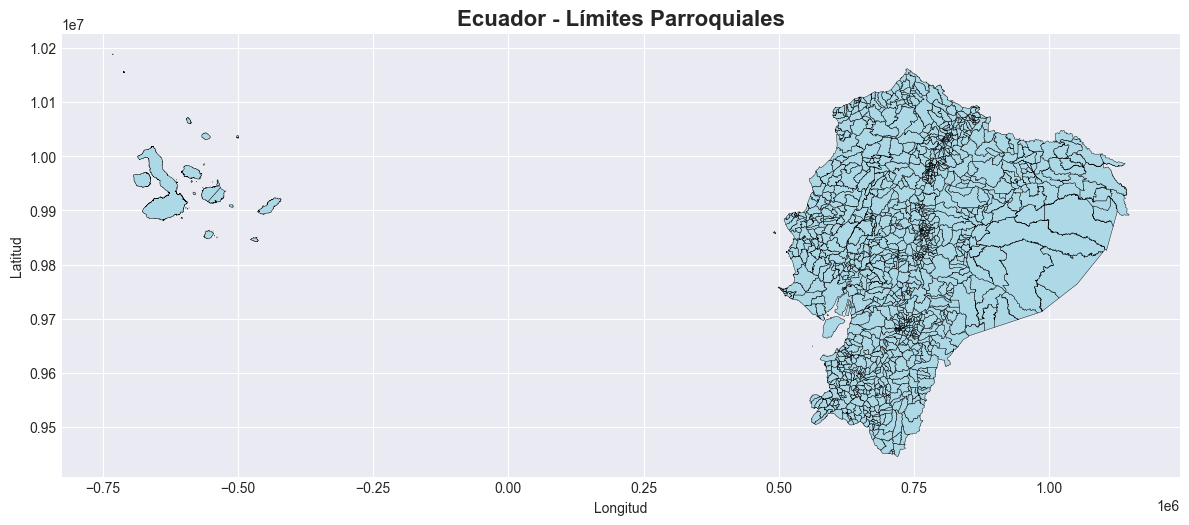

✅ Mapa generado con 1236 parroquias


In [77]:
# Visualización rápida del mapa
fig, ax = plt.subplots(figsize=(12, 10))
parroquias.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth=0.3)
ax.set_title('Ecuador - Límites Parroquiales', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.tight_layout()
plt.show()

print(f"✅ Mapa generado con {len(parroquias)} parroquias")

---
## 5. Exploración: MAATE - Infraestructura Petrolera

**Capas esperadas:**
1. Contaminación por hidrocarburos
2. Gaseoductos
3. Poliductos
4. Pozos
5. Refinerías

In [78]:
# Listar todos los shapefiles en MAATE
print("📂 ARCHIVOS DISPONIBLES EN MAATE:")
maate_files = list(MAATE_DIR.glob('*.shp'))
for f in maate_files:
    print(f"  - {f.name}")

print(f"\nTotal de shapefiles encontrados: {len(maate_files)}")

📂 ARCHIVOS DISPONIBLES EN MAATE:
  - v_aa011_contaminacion_hidrocarburo_pMPoint.shp
  - Gasoductos_Petroecuador.shp
  - Poliductos_Petroecuador.shp
  - Pozos.shp
  - Refinerias2.shp

Total de shapefiles encontrados: 5


In [82]:
# Cargar cada shapefile de MAATE explícitamente
print("📂 CARGANDO CAPAS DE INFRAESTRUCTURA PETROLERA...")

maate_layers = {}

# 1. Contaminación por hidrocarburos
print("\n" + "="*70)
print("📍 CAPA: Contaminación por Hidrocarburos")
print("="*70)
contaminacion = gpd.read_file(MAATE_DIR / 'v_aa011_contaminacion_hidrocarburo_pMPoint.shp')
maate_layers['contaminacion'] = contaminacion
print(f"Dimensiones: {contaminacion.shape}")
print(f"Tipo de geometría: {contaminacion.geometry.geom_type.unique()}")
print(f"Sistema de coordenadas: {contaminacion.crs}")
print(f"Columnas: {contaminacion.columns.tolist()}")

# 2. Gaseoductos
print("\n" + "="*70)
print("📍 CAPA: Gaseoductos PetroEcuador")
print("="*70)
gaseoductos = gpd.read_file(MAATE_DIR / 'Gasoductos_Petroecuador.shp')
maate_layers['gaseoductos'] = gaseoductos
print(f"Dimensiones: {gaseoductos.shape}")
print(f"Tipo de geometría: {gaseoductos.geometry.geom_type.unique()}")
print(f"Sistema de coordenadas: {gaseoductos.crs}")
print(f"Columnas: {gaseoductos.columns.tolist()}")

# 3. Poliductos
print("\n" + "="*70)
print("📍 CAPA: Poliductos PetroEcuador")
print("="*70)
poliductos = gpd.read_file(MAATE_DIR / 'Poliductos_Petroecuador.shp')
maate_layers['poliductos'] = poliductos
print(f"Dimensiones: {poliductos.shape}")
print(f"Tipo de geometría: {poliductos.geometry.geom_type.unique()}")
print(f"Sistema de coordenadas: {poliductos.crs}")
print(f"Columnas: {poliductos.columns.tolist()}")

# 4. Pozos
print("\n" + "="*70)
print("📍 CAPA: Pozos Petroleros")
print("="*70)
pozos = gpd.read_file(MAATE_DIR / 'Pozos.shp')
maate_layers['pozos'] = pozos
print(f"Dimensiones: {pozos.shape}")
print(f"Tipo de geometría: {pozos.geometry.geom_type.unique()}")
print(f"Sistema de coordenadas: {pozos.crs}")
print(f"Columnas: {pozos.columns.tolist()}")

# 5. Refinerías
print("\n" + "="*70)
print("📍 CAPA: Refinerías")
print("="*70)
refinerias = gpd.read_file(MAATE_DIR / 'Refinerias2.shp')
maate_layers['refinerias'] = refinerias
print(f"Dimensiones: {refinerias.shape}")
print(f"Tipo de geometría: {refinerias.geometry.geom_type.unique()}")
print(f"Sistema de coordenadas: {refinerias.crs}")
print(f"Columnas: {refinerias.columns.tolist()}")

print("\n" + "="*70)
print("✅ RESUMEN DE CAPAS CARGADAS")
print("="*70)
for layer_name, gdf in maate_layers.items():
    geom_type = gdf.geometry.geom_type.unique()[0]
    print(f"{layer_name:20s} - {len(gdf):5d} features ({geom_type})")

📂 CARGANDO CAPAS DE INFRAESTRUCTURA PETROLERA...

📍 CAPA: Contaminación por Hidrocarburos
Dimensiones: (7850, 14)
Tipo de geometría: ['MultiPoint']
Sistema de coordenadas: EPSG:32717
Columnas: ['codigo_de_', 'nombre', 'bloque_pet', 'anio_de_re', 'coordenada', 'tipo_fuent', 'coordenad0', 'estado', 'anio_elimi', 'area_rehab', 'operadora', 'texto_asoc', 'nombre_ter', 'geometry']

📍 CAPA: Gaseoductos PetroEcuador
Dimensiones: (19, 4)
Tipo de geometría: ['LineString']
Sistema de coordenadas: EPSG:32717
Columnas: ['Id', 'Nombre', 'Long_km', 'geometry']

📍 CAPA: Poliductos PetroEcuador
Dimensiones: (10, 5)
Tipo de geometría: ['LineString' 'MultiLineString']
Sistema de coordenadas: EPSG:32717
Columnas: ['Nombre', 'Longitud', 'Diametro', 'Productos_', 'geometry']

📍 CAPA: Pozos Petroleros
Dimensiones: (6287, 15)
Tipo de geometría: ['Point']
Sistema de coordenadas: EPSG:4326
Columnas: ['nombre', 'cuenca', 'provincia', 'bloq', 'campo', 'operad', 'x', 'y', 'st_coord', 'datum', 'official_n', 'origi

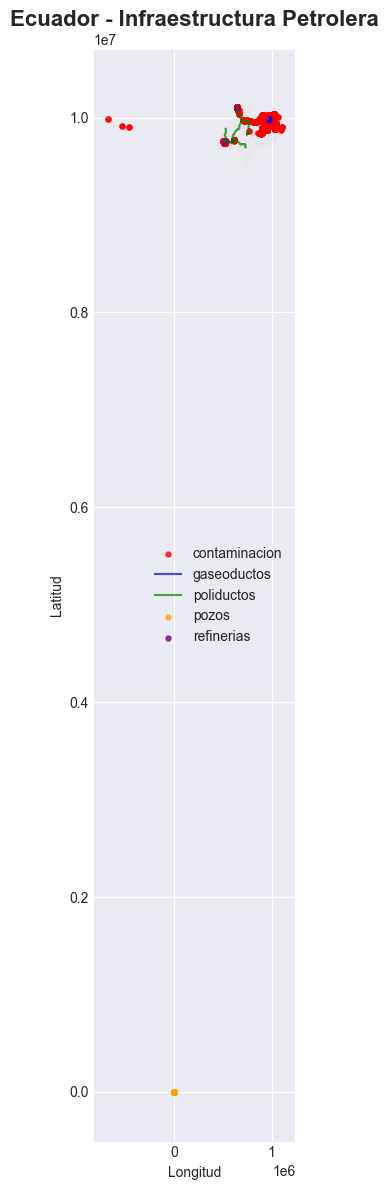

✅ Mapa de infraestructura petrolera generado


In [83]:
# Visualización de todas las capas juntas
fig, ax = plt.subplots(figsize=(14, 12))

# Fondo: parroquias
parroquias.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.2, alpha=0.3)

# Capas de petróleo
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (layer_name, gdf) in enumerate(maate_layers.items()):
    color = colors[i % len(colors)]
    gdf.plot(ax=ax, color=color, markersize=10, linewidth=1.5, alpha=0.7, label=layer_name)

ax.set_title('Ecuador - Infraestructura Petrolera', fontsize=16, fontweight='bold')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Mapa de infraestructura petrolera generado")

---
## 6. Resumen y Próximos Pasos


## FUENTES DE DATOS VALIDADAS

### 1. **INEC - Censo de Población 2022 (Autoidentificación Étnica)**

**Archivo:** `1.2.csv`

**Estado:** ✅ Cargado y limpio

**Hallazgos:**
- **822 parroquias** a nivel nacional (después de filtros)
- Población total y población afroecuatoriana por parroquia
- **% población afro calculado correctamente**

**Problemas resueltos:**
- Formato CSV caótico con encabezados múltiples (resuelto con `skiprows=9`)
- Encoding Latin-1 en vez de UTF-8
- Filas agregadas a nivel nacional, provincial y cantonal (filtradas exitosamente)
- Separadores de miles en números (`,` eliminadas)

**Estadísticas clave:**
- Parroquias con >50% población afro: **9**
- Parroquias con >25% población afro: **29**
- Parroquias con >10% población afro: **42**
- Parroquias con >5% población afro: **59**

**TOP provincias con población afro:**
1. **Esmeraldas** (costa norte) - concentración muy alta
2. **Carchi/Imbabura** (Valle del Chota) - comunidades históricas en Sierra
3. Presencia dispersa en otras provincias

---

### 2. **MSP - Recursos y Actividades de Salud (RAS) 2020**

**Archivo:** `RAS_2020.csv`

**Estado:** ✅ Cargado y limpio

**Hallazgos:**
- **4,136 establecimientos** de salud a nivel nacional
- **10 columnas útiles** seleccionadas de 1,931 totales

**Columnas relevantes:**
- `prov_ubi`, `cant_ubi`, `parr_ubi` (ubicación administrativa)
- `clase` (tipo de establecimiento)
- `entidad` (administrador)
- `sector` (público/privado)
- `tipo`, `area`, `region`

**Problemas resueltos:**
- Separador punto y coma (`;`) en vez de coma
- BOM (Byte Order Mark) al inicio del archivo
- 1,921 columnas innecesarias (filtradas)

**Decisión clave:**
- ❌ No hay coordenadas exactas ni nombres de establecimientos
- ✅ **Solución adoptada:** Asignar centroide de parroquia a cada establecimiento
- **Justificación:** Consistente con análisis a nivel parroquial

---

### 3. **CONALI - División Político-Administrativa**

**Archivo:** `LIMITE_PARROQUIAL_CONALI_CNE_2022.shp`

**Estado:** ✅ Cargado exitosamente

**Hallazgos:**
- **1,236 parroquias** (coincide con estructura censal)
- Sistema de coordenadas: **EPSG:32717** (UTM Zona 17S)
- 11 atributos por parroquia

**Uso:**
- Base geoespacial para todos los análisis territoriales
- Cálculo de centroides para geocodificación de establecimientos de salud
- Unidad de análisis para clustering

---

### 4. **MAATE - Infraestructura Petrolera**

**Archivos:** 5 shapefiles

**Estado:** ✅ Todas las capas cargadas

#### **Detalle por capa:**

| Capa | Features | Geometría | CRS | Descripción |
|------|----------|-----------|-----|-------------|
| **Contaminación** | 7,850 | MultiPoint | EPSG:32717 | Puntos de contaminación por hidrocarburos |
| **Gaseoductos** | 19 | LineString | EPSG:32717 | Red de gaseoductos PetroEcuador |
| **Poliductos** | 10 | LineString/Multi | EPSG:32717 | Red de poliductos PetroEcuador |
| **Pozos** | 6,287 | Point | **EPSG:4326** | Pozos petroleros activos |
| **Refinerías** | 3 | Point | EPSG:32717 | Refinerías principales |

**⚠️ Problema detectado:**
- **Sistema de coordenadas inconsistente:** Pozos en EPSG:4326, resto en EPSG:32717
- **Solución:** Estandarizar todo a EPSG:4326 en fase de ETL

**Refinerías identificadas:**
1. Esmeraldas
2. La Libertad
3. Shushufindi

---

## CONCLUSIONES

### **Viabilidad del Proyecto:**
**CONFIRMADA** - Todas las fuentes de datos están disponibles y son utilizables

### **Calidad de Datos:**
- **INEC:** Media (requiere limpieza intensiva pero datos sólidos)
- **MSP:** Alta (estructura clara, solo requiere geocodificación aproximada)
- **CONALI:** Alta (datos geoespaciales oficiales y completos)
- **MAATE:** Alta (cobertura completa de infraestructura petrolera)

### **Limitaciones Identificadas:**

1. **Temporal:**
   - Censo INEC: 2022
   - RAS: 2020
   - Shapefiles MAATE: año variable (aparentemente actualizados)
   - **Impacto:** Bajo - ventana temporal aceptable (2020-2022)

2. **Espacial:**
   - Sin coordenadas exactas de establecimientos de salud
   - **Mitigación:** Uso de centroides parroquiales

3. **Técnica:**
   - Sistemas de coordenadas mixtos
   - **Mitigación:** Reproyección en ETL

---

## NOTAS FINALES

- **Fortaleza del proyecto:** Triangulación territorial clara (etnia + salud + petróleo)
- **Riesgo principal:** Tiempo de procesamiento espacial
- **Decisión metodológica clave:** Uso de centroides para geocodificación
- **Variable objetivo:** % población afroecuatoriana + métricas de exposición petrolera + acceso a salud